In [1]:
import datetime
time_start = datetime.datetime.now()
print('start time:',time_start)

start time: 2022-01-13 18:38:47.060406


In [2]:
filename_data = "../scClass_data/cordblood_pp.h5ad"

In [3]:
import sys; sys.path.append("/home/shhsu/download/scClass_v2")
import scClass
from scClass.train import Model

In [4]:
import scanpy as sc

In [5]:
adata = sc.read_h5ad(filename_data)

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [6]:
adata = scClass.pp.transmodel(adata,gene='gene_names',gene_ref='Gene')

/home/shhsu/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


get gene seq...
0% 8% 17% 25% 34% 42% 51% 59% 68% 77% 85% 94% 
Of 58347 genes in the input file, 20409 were found in the training set of 20729 genes.
mapping to model...
0% 28% 56% 84% 

In [7]:
adata = scClass.pp.preprocess(adata,filter=True,random=False,normalize=True)

filter type_id=-1 cell:  263828  -> 203638  cells


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


normalizing data


In [8]:
model = scClass.load()

loading model from:  /home/shhsu/download/scClass_v2/scClass/data/model_default.pkl


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0]
0% 0% 1% 2% 3% 4% 5% 6% 7% 8% 9% 10% 11% 12% 13% 14% 15% 16% 17% 18% 19% 20% 21% 22% 23% 24% 25% 26% 27% 28% 29% 30% 31% 32% 33% 34% 35% 36% 37% 38% 39% 40% 41% 42% 43% 44% 45% 46% 47% 48% 49% 50% 51% 52% 53% 54% 54% 55% 56% 57% 58% 59% 60% 61% 62% 63% 64% 65% 66% 67% 68% 69% 70% 71% 72% 73% 74% 75% 76% 77% 78% 79% 80% 81% 82% 83% 84% 85% 86% 87% 88% 89% 90% 91% 92% 93% 94% 95% 96% 97% 98% 99% 

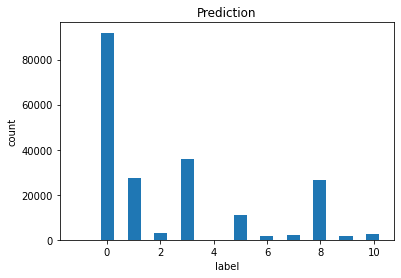

In [16]:
y_pred = scClass.predict(adata,model,batch_size=2000)

In [ ]:
# scClass.save_predict('y_pred_cordblood.csv',y_pred)

## Verify with previous label

total acc: 85.42118857973463 %


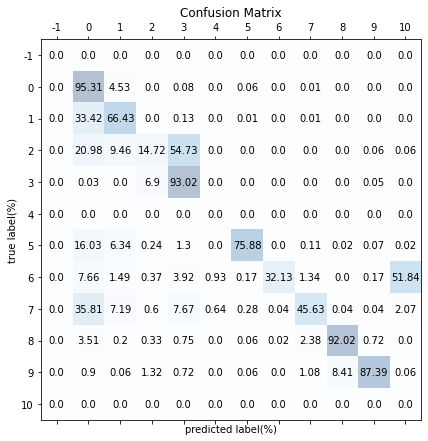

In [17]:
y_true = adata.obs['transfer_id'].values 
scClass.confusion_matrix(y_pred,y_true)

In [20]:
import numpy as np
Y_pred = np.array(y_pred[y_true>=-1])
Y_true = y_true[y_true>=-1]
accuary = (Y_pred==Y_true).sum()/Y_pred.shape[0]
from sklearn.metrics import *
precision = precision_score(Y_pred,Y_true,average=None)
precision = precision[precision>0].mean()
recall = recall_score(Y_pred,Y_true,average=None)
recall = recall[recall>0].mean()
f1 = f1_score(Y_pred,Y_true,average=None)
f1 = f1[f1>0].mean()
import pandas as pd
table = [
  ['accuary',accuary],
  ['precision',precision],
  ['recall',recall],
  ['f1-score',f1]
]
pd.DataFrame(table)

0         1
0    accuary  0.854212
1  precision  0.669472
2     recall  0.788986
3   f1-score  0.704887

In [21]:
time_end = datetime.datetime.now()
print('-------------Time Record---------------')
print('start time:',time_start)
print('  end time:',time_end)
print('---------Run time----------')
delta = (time_end-time_start).__str__().split(':')
print(delta[0],'hr,',delta[1],'min,',delta[2],'sec')

-------------Time Record---------------
start time: 2022-01-05 10:20:58.491014
  end time: 2022-01-05 10:42:32.967265
---------Run time----------
0 hr, 21 min, 34.476251 sec


In [ ]:
# c1 = [0,0,0,0,0,1,1,1,1,1]
# c2 = [0,0,0,1,1,0,1,1,1,1]
# print('F1-score:',f1_score(c1, c2, average=None))
# print('macro F1-score(average):',f1_score(c1, c2, average='macro'))